### Derivative of Tanh

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
IMG_FILEPATH = "../../01_deep-learning-from-scratch/images/04_extensions/"

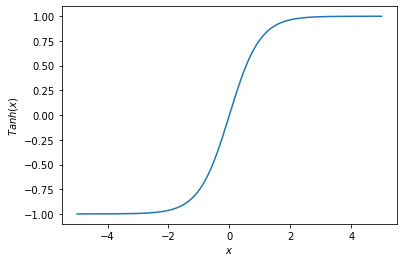

In [3]:
a = np.arange(-5, 5, 0.01)
plt.plot(a, np.tanh(a))
# plt.title("Tanh activation")
plt.xlabel("$x$")
plt.ylabel("$Tanh(x)$")
plt.savefig(IMG_FILEPATH + "05_tanh_activation.png")

In [4]:
(a[501] - a[500]) / 0.01

0.9999999999999787

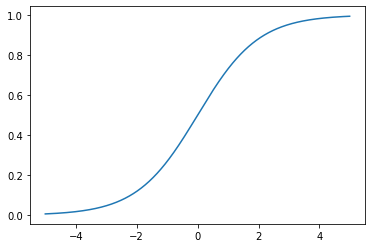

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

a = np.arange(-5, 5, 0.01)
plt.plot(a, sigmoid(a))

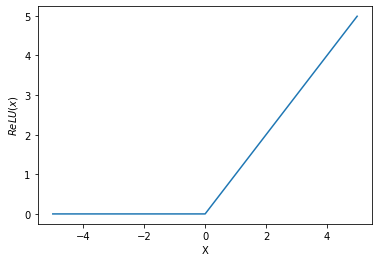

In [6]:
def relu(x):
    return np.array([el if el > 0 else 0 for el in x])

a = np.arange(-5, 5, 0.01)
plt.plot(a, relu(a))
# plt.title("ReLU activation function")
plt.xlabel("X")
plt.ylabel("$ReLU(x)$")
plt.savefig(IMG_FILEPATH + "04_relu_activation.png")

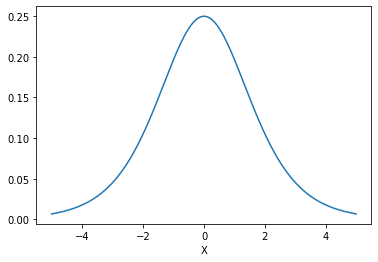

In [7]:
a = np.arange(-5, 5, 0.01)
plt.plot(a, sigmoid(a) * (1-(sigmoid(a))))
# plt.title("Deriviative of $sigmoid(x)$")
plt.xlabel("X")
plt.savefig(IMG_FILEPATH + "04_sigmoid_derivative.png")

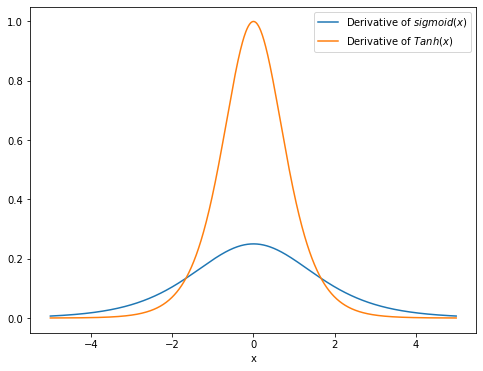

In [8]:
a = np.arange(-5, 5, 0.01)
plt.figure(figsize=(8,6))
plt.plot(a, sigmoid(a) * (1-(sigmoid(a))))
plt.plot(a, 1 - (np.tanh(a) **2))
plt.legend(['Derivative of $sigmoid(x)$', 
            'Derivative of $Tanh(x)$'])
# plt.title("Derivatives of $sigmoid(x)$ and $Tanh(x)$")
plt.xlabel("x");
plt.savefig(IMG_FILEPATH + "06_sigmoid_tanh_derivative.png")

## Vectors/Probabilities

$$ \begin{bmatrix}p_1 \\ \vdots \\ p_n \end{bmatrix} $$

$$ \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix} $$

# Cross entropy/softmax

$ \text{CE}(p_i, y_i) = - y_i * \text{log}(p_i) - (1 - y_i) * \text{log}(1-p_i) $


$$ CE(x, y) = \sum_{i}{(- y_i * log(p_i) - (1 - y_i) * log(1-p_i))} $$

$$ \begin{align} &\sum_{i}{(- 0 * log(p_i) - (1 - 0) * log(1-p_i))} \\
=  &\sum_{i}{- log(1-p_i))} \end{align}$$


$$ CE(x, 0) = \sum_{i}{(- y_i * log(p_i) - (1 - y_i) * log(1-p_i))} $$

$$ \begin{align} &\sum_{i}{(- 0 * log(p_i) - (1 - 0) * log(1-p_i))} \\
=  &\sum_{i}{- log(1-p_i))} \end{align}$$

$$ \text{Normalize}(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix})  = \begin{bmatrix} \frac{x_1}{x_1 + x_2 + x_3} \\ 
\frac{x_2}{x_1 + x_2 + x_3} \\
\frac{x_3}{x_1 + x_2 + x_3}
\end{bmatrix} $$

$$ \text{Softmax}(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix})  = \begin{bmatrix} \frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3}} \\ 
\frac{e^{x_2}}{e^{x_1} + e^{x_2} + e^{x_3}} \\
\frac{e^{x_3}}{e^{x_1} + e^{x_2} + e^{x_3}}
\end{bmatrix} $$

$$ S(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_n \end{bmatrix})  = \begin{bmatrix} \frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3} + \ldots + e^{x_n}} \\ 
\frac{e^{x_2}}{e^{x_1} + e^{x_2} + e^{x_3} + \ldots + e^{x_n}} \\
\frac{e^{x_3}}{e^{x_1} + e^{x_2} + e^{x_3} + \ldots + e^{x_n}} \\
\ldots \\
\frac{e^{x_n}}{e^{x_1} + e^{x_2} + e^{x_3} + \ldots + e^{x_n}}
\end{bmatrix} $$

$ {SCE}_1 = - y_1 * log(\frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3}}) - (1 - y_1) * log(1-\frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3}}) $

$$ \text{softmax}(\begin{bmatrix} p_1 \\ p_2 \\ p_3 \end{bmatrix}) - \begin{bmatrix} y_1 \\ y_2 \\ y_3 \end{bmatrix} $$

#### Number of hidden neurons

$$ 89 \approx \sqrt{784 * 10} $$

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## Overall log loss formula

$$ \sum_{i}{(- y_i * log(p_i) - (1 - y_i) * log(1-p_i))} $$

## Intuition

### Case 1: $y_i = 0$

Formula becomes:

$$ \begin{align} &\sum_{i}{(- 0 * log(p_i) - (1 - 0) * log(1-p_i))} \\
=  &\sum_{i}{- log(1-p_i))} \end{align}$$

### Plot of loss when $y_i = 0$

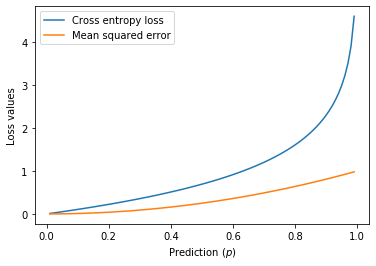

In [10]:
x = np.linspace(0.01, 0.99, 99)
y1 = -1.0 * np.log(1 - x)
y2 = (x - 0) ** 2
plt.plot(x, y1);
plt.plot(x, y2);
plt.legend(['Cross entropy loss', 'Mean squared error'])

# plt.title("Cross entropy loss vs. MSE when $y = 0$")
plt.xlabel("Prediction ($p$)")
plt.ylabel("Loss values");
plt.savefig(IMG_FILEPATH + "04_Log_loss_vs_MSE_y_eq_0.png")

When $y=0$, loss can become theoretically infinite as $p$ approaches 1.

### Case 2: $y_i = 1$

Formula reduces to:

$$ \begin{align} &\sum_{i}{(- 1 * log(p_i) - (1 - 1) * log(1-p_i))} \\
=  &\sum_{i}{- log(p_i)} \end{align}$$

### Plot of loss when $y_i = 1$

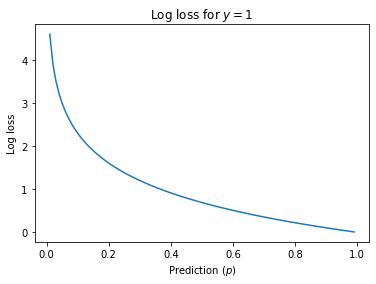

In [10]:
x = np.linspace(0.01, 0.99, 99)
y = -1.0 * np.log((x))

plt.plot(x, y);
plt.title("Log loss for $y = 1$")
plt.xlabel("Prediction ($p$)")
plt.ylabel("Log loss");

In [11]:
p = np.array([[0.1, 0.4, 0.5], [0.3, 0.4, 0.3]])
y = np.array([[0, 1, 0], [1, 0, 0]])

## Derivation of Softmax Cross Entropy derivative (simple case, two probabilities)

$$ C(p, y) = - y * \text{log}(p) - (1 - y) * \text{log}(1-p) $$

$$
C(p,y)=
\begin{cases}
-log(1-p) & \text{if }  y = 0\\
-log(p) & \text{if }  y = 1
\end{cases}
$$

$$ \text{SCE}(\begin{bmatrix} p_1 \\ p_2 \end{bmatrix}, \begin{bmatrix} y_1 \\ y_2 \end{bmatrix})_1 = - y_1 * log(S(\begin{bmatrix} p_1 \\ p_2 \end{bmatrix})_1) - (1 - y_1) * log(1-S(\begin{bmatrix} p_1 \\ p_2 \end{bmatrix})_1) = - y_1 * log(\frac{e^{p_1}}{e^{p_1} + e^{p_2}}) - (1 - y_1) * log(1-\frac{e^{p_1}}{e^{p_1} + e^{p_2}}) $$

In [12]:
x = np.arange(9).reshape((3,3))

In [13]:
np.diag(x)

array([0, 4, 8])

Structure:

$ y_1 = a $, $e^{x_2} = b$

$$ SC(x_1) = - a * log(\frac{e^{x_1}}{e^{x_1} + b}) - (1 - a) * log(1-\frac{e^{x_1}}{e^{x_1} + b}) $$

**Quotient rule:**

$$ f(x) = \frac{g(x)}{h(x)} $$ 

$$ f'(x) = \frac{g'(x) * h(x) - g(x) * h'(x)}{(h(x))^2} $$

If

$$ f(x) = \frac{e^x}{e^x + b} $$ 

$$ \begin{align} f'(x) =& \frac{e^x * (e^x + b) - (e^x * e^x)}{(e^x + b)^2} \\ 
=& \frac{e^x * (e^x + b - e^ x)}{(e^x + b)^2} \\
=& \frac{e^x * b}{(e^x + b)^2}\end{align} $$

And if:

$$ g(x) = - a * log(f(x)) - (1 - a) * log(1-f(x)) $$

then:

$$ g'(x) = - a * \frac{f'(x)}{f(x)} - (1 - a) * \frac{-1 * f'(x)}{1-f(x)} $$

First, we'll compute $\frac{f'(x)}{f(x)}$:

$$ \begin{align} 
\frac{f'(x)}{f(x)} =& \frac{\frac{e^x * b}{(e^x + b)^2}}{\frac{e^x}{e^x + b}} \\\\
=& \frac{-e^x * b}{(e^x + b)^2} * \frac{e^x + b}{e^x}
 \\
=& \frac{b}{e^x + b} \end{align} $$

Now, in this next part, we'll use the fact that:

$$ \frac{b}{e^x + b} = 1 - \frac{e^x}{e^x + b} $$

$ \begin{align} 
\frac{-1 * f'(x)}{1 - f(x)} =& \frac{-1 * \frac{e^x * b}{(e^x + b)^2}}{1 - \frac{e^x}{e^x + b}} \\
=& \frac{\frac{-e^x * b}{(e^x + b)^2}}{\frac{b}{e^x + b}} \\
=& \frac{-e^x * b}{(e^x + b)^2} * \frac{e^x + b}{b}
 \\
=& \frac{-e^x}{e^x + b} \end{align}$

Finally, putting these pieces together:

$$ \begin{align} SC'(x) =& - a * \frac{f'(x)}{f(x)} - (1 - a) * \frac{-1 * f'(x)}{1-f(x)} \\ 
=& -a * \frac{b}{e^x + b} - (1 - a) * \frac{-e^x}{e^x + b} \\ 
=& -a * \frac{b}{e^x + b} + \frac{e^x}{e^x + b} - a * \frac{-e^x}{e^x + b} \\ 
=& -a * (1 - \frac{e^x}{e^x + b}) + \frac{e^x}{e^x + b} - a * \frac{-e^x}{e^x + b} \\
=& -a + a * \frac{e^x}{e^x + b} + \frac{e^x}{e^x + b} - a * \frac{-e^x}{e^x + b} \\
=& -a + \frac{e^x}{e^x + b} \\
\end{align} \\ 
$$

That's right, the derivative to be sent backward from the softmax layer is simply:

$$ S - Y = s(\begin{bmatrix} p_1 \\ p_2 \end{bmatrix}) - \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} = \begin{bmatrix} \frac{e^{p_1}}{e^{p_1} + e^{p_2}} - y_1 \\ \frac{e^{p_2}}{e^{p_1} + e^{p_2}} - y_2 \end{bmatrix} $$

This makes sense:

* The softmax output will always be between 0 and 1.
* If $y_i$ is 0, then $ s(x_1) - y_1 $ will be a positive number: because indeed, if we increase the value of $x_1$, the loss will increase. Conversely if $y_i$ is one.
* Note that this loss function only makes sense because $ s(x_i) $ is always between 0 and 1. 

This, by the way, is why TensorFlow has a function called `softmax_cross_entropy_with_logits`!

### Log softmax

$$ \begin{bmatrix} p_1 \\ p_2 \end{bmatrix} \Rightarrow 
\begin{bmatrix} log(\frac{e^{p_1}}{e^{p_1} + e^{p_2}}) \\ log(\frac{e^{p_2}}{e^{p_1} + e^{p_2}}) \end{bmatrix} =
\begin{bmatrix} p_1 - (max(p_1, p_2) - log({e^{p_1 - m} + e^{p_2- m}}) \\ p_2 - (max(p_1, p_2) - log({e^{p_1 - m} + e^{p_2- m}}) \end{bmatrix}$$

### Logistic normalization

$$ \begin{bmatrix} p_1 \\ p_2 \\ p_3 \\ \vdots \\ p_n \end{bmatrix} \Rightarrow \begin{bmatrix} p_1 & 1-p_1 \\ p_2 & 1-p_2 \\ p_3 & 1-p_3 \\ \vdots & \vdots \\ p_n & 1-p_n \end{bmatrix} $$ 

Opposite:

$$ \begin{bmatrix} p_1 & 1-p_1 \\ p_2 & 1-p_2 \\ p_3 & 1-p_3 \\ \vdots & \vdots \\ p_n & 1-p_n \end{bmatrix} \Rightarrow \begin{bmatrix} p_1 \\ p_2 \\ p_3 \\ \vdots \\ p_n \end{bmatrix} $$ 

### Numerically stable softmax math

$$ log(softmax(x_j)) = log(\frac{e^{x_j}}{\sum_i^n e^{x_j}}) = x_j - logsumexp(X) $$

$$ e^{x - logsumexp(x)} = softmax(x) $$

$$ logsumexp(X) = log(\sum_i^n e^{x_i}) = c + log(\sum_i^n e^{x_i - c}) $$

### One hot encoding

$$ [0, 2, 1] \Rightarrow \begin{bmatrix} 1 & 0 & 0 & \ldots & 0 \\ 0 & 0 & 1 & \ldots & 0 \\ 0 & 1 & 0 & \ldots & 0 \end{bmatrix} $$ 

### Learning rate decay

#### Linear decay

$$ \alpha_{t} = \alpha_{start} - (\alpha_{start} - \alpha_{end}) * \frac{t}{N} $$

#### Exponential decay

$$ \alpha_{t} = \alpha_{start} * ((\frac{\alpha_{end}}{\alpha_{start}})^\frac{1}{N})^t $$

## SGD Momentum gradient formula

$ \text{update} = \nabla_t + \mu * \nabla_{t-1} + \mu^2 * \nabla_{t-2} + \ldots $

## Weight init illustrations

#### Feature level math

$ f_n = w_{1, n}* x_1 + \ldots + w_{784, n}* x_{784} + b_n $

$ \text{Var}(w_{i,j}) = 1 $

$ \text{Var}(X_1 + X_2) = \text{Var}(X_1) + \text{Var}(X_2) $

In [12]:
import seaborn as sns

In [13]:
n_feat = 784
n_hidden = 256

np.random.seed(190131)

In [14]:
a = np.random.randn(1, n_feat)

In [15]:
b = np.random.randn(n_feat, n_hidden)

In [16]:
out = np.dot(a, b).reshape(n_hidden)

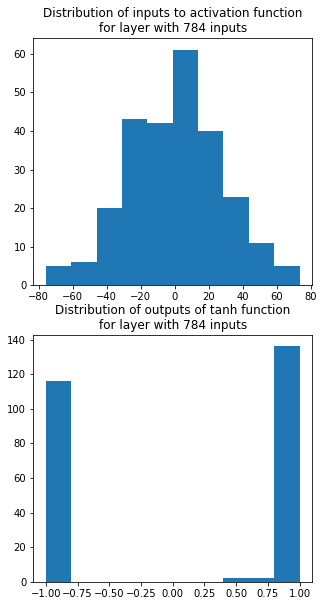

In [17]:
fig, ax = plt.subplots(2, figsize=(5, 10))
ax[0].hist(out)
ax[0].set_title("Distribution of inputs to activation function\nfor layer with 784 inputs")
ax[1].hist(np.tanh(out))
ax[1].set_title("Distribution of outputs of tanh function\nfor layer with 784 inputs")
fig.savefig(IMG_FILEPATH + "01_weight_init_activation_illustration.png")

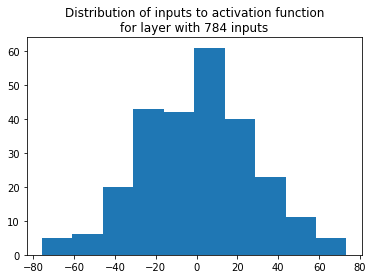

In [19]:
plt.hist(out)
plt.title();
plt.savefig("img/00_weight_init_activation_input.png")

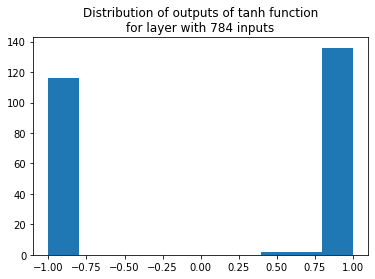

In [21]:
plt.hist(np.tanh(out))
plt.title("Distribution of outputs of tanh function\nfor layer with 784 inputs");
plt